# Лабораторна робота №2
## Завдання 2
## Побудувати двонаправлену RNN для розрахунку функції із шумом
## Авдєєва Серафима ФІТ 4-4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [2]:
# Генерація даних
N = 10000
x = np.linspace(0, 50, N)
data = np.sin(x / 5) + 0.1 * np.random.randn(N)  

# Підготовка даних для моделі
def prepare_data(data, steps=5):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

steps = 5
X, y = prepare_data(data, steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape для RNN

In [3]:
# Побудова моделі
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Навчання моделі
model.fit(X, y, epochs=20, verbose=1)

C:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1130
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0125
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0122
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0125
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0125
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [6]:
# Прогнозування
predictions = model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


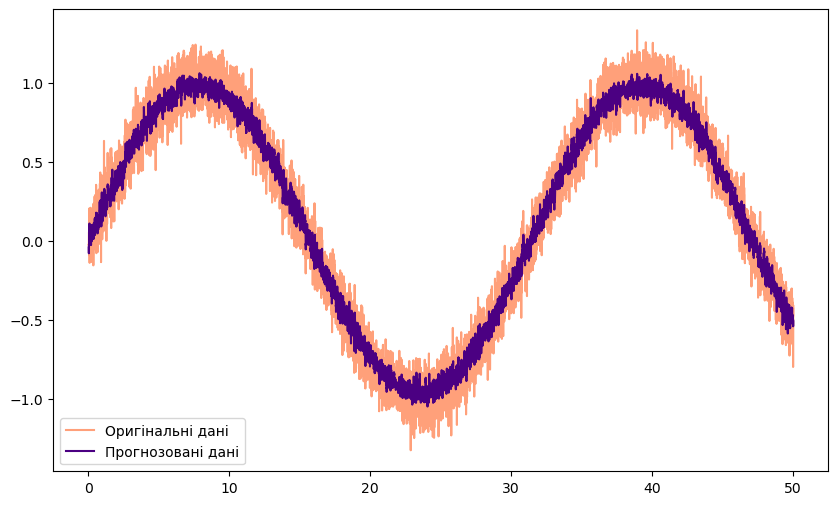

In [10]:
# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(x[steps:], data[steps:], label='Оригінальні дані', color="lightsalmon")
plt.plot(x[steps:], predictions[:, 0], label='Прогнозовані дані', color="indigo")
plt.legend()
plt.show()

# Висновок
У цій роботі ми розглянули процес побудови та навчання двонаправленої рекурентної нейронної мережі (Bidirectional RNN) для прогнозування значень тригонометричної функції з доданим шумом. Використовуючи TensorFlow та Keras, ми створили модель, яка вчилася на основі синтетично генерованих даних, і продемонстрували її здатність прогнозувати значення функції.

Основні моменти роботи:

- **Генерація даних**: Ми синтезували набір даних, використовуючи тригонометричну функцію `sin(x/5)` з додаванням гаусівського шуму. Це дозволило нам створити реалістичний сценарій для тестування нашої моделі.
  
- **Підготовка даних**: Ми підготували дані для навчання, створивши послідовності фіксованої довжини, що дозволило моделі вчитися прогнозувати наступне значення на основі попередніх спостережень.

- **Побудова моделі**: Модель складалася з двонаправленого шару LSTM, що дозволяє ефективно обробляти послідовності даних, враховуючи контекст як в прямому, так і в зворотному напрямках. Це забезпечує більш точне прогнозування порівняно з однонаправленою RNN.

- **Навчання та оцінка моделі**: Модель була навчена з використанням оптимізатора Adam та функції втрат MSE. Після навчання ми використали модель для прогнозування та порівняли прогнозовані значення з оригінальними даними, що демонструє здатність моделі вловлювати основні тенденції в даних навіть з наявністю шуму.

- **Візуалізація результатів**: Графік, що порівнює оригінальні та прогнозовані дані, підкреслює ефективність моделі у вловлюванні патернів у даних, незважаючи на присутність шуму.

Двонаправлені RNN є потужним інструментом для аналізу послідовностей даних, особливо коли контекст важливий для розуміння як попередніх, так і наступних спостережень у послідовності. Цей підхід може бути застосований до широкого спектру задач.